# 概念
以下順番で行わないと性能が良くならない<br>
データ取得…画像、信号、センサなど<br>
特徴量抽出…数値、特徴量ベクトル<br>
特徴選択…どの特徴を使うか選択<br>
特徴変換<br>
正規化<br>
識別<br>

# 欠損値・データクリーニング

データを確認するとNaNが含まれてしまっていることがわかる

In [1]:
import numpy as np
with open('2D_example_dame.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602



説明変数を目的変数に分ける

In [2]:
data = np.loadtxt("2D_example_dame.csv", delimiter=",")
y = data[:,0].astype(int) # 1列目がラベル．整数に変換

In [3]:
X = data[:,1:3] # 2,3列目がデータ
X

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,              nan],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [             nan,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

プロットして状況を確認すると外れ値もあることがわかる

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

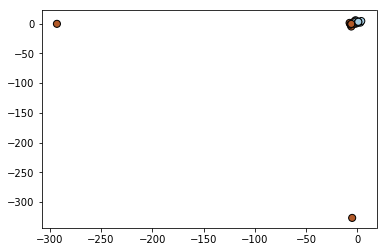

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

外れ値を除くといい感じでばらけていることがわかる

(-10, 10)

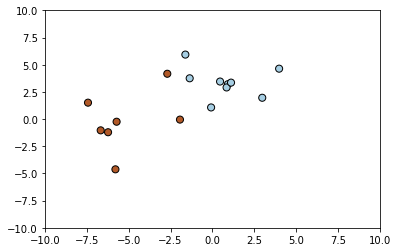

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
plt.xlim(-10,10)
plt.ylim(-10,10)

##### NaNを除外

In [7]:
~np.isnan(X[:, 0]) # １列目

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True], dtype=bool)

In [8]:
~np.isnan(X[:, 1]) # ２列目

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True], dtype=bool)

In [9]:
~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0]) #and

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True], dtype=bool)

In [10]:
X1 = X[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]  # 除外
y1 = y[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]

In [11]:
X1, X1.shape

(array([[ -7.42847600e+00,   1.50990300e+00],
        [  2.98069300e+00,   1.96082100e+00],
        [  3.98825500e+00,   4.63638900e+00],
        [ -5.78943700e+00,  -4.62161400e+00],
        [ -4.89444700e+00,  -3.26973000e+02],
        [ -1.93394900e+00,  -4.72760000e-02],
        [ -1.61177100e+00,   5.93220100e+00],
        [ -6.67015200e+00,  -1.03628200e+00],
        [ -2.93141500e+02,  -1.04475000e-01],
        [ -7.47620000e-02,   1.07000200e+00],
        [ -2.69179300e+00,   4.16877400e+00],
        [  4.61182000e-01,   3.45343800e+00],
        [ -1.35413500e+00,   3.75165700e+00],
        [ -6.22947600e+00,  -1.20943400e+00],
        [ -5.71957800e+00,  -2.43509000e-01],
        [  9.28322000e-01,   3.20852000e+00],
        [  8.50475000e-01,   2.90895500e+00],
        [  1.11602500e+00,   3.35360200e+00]]), (18, 2))

##### 外れ値を除外
１０以下だけを正常値とする

In [12]:
(abs(X1[:, 0]) < 10), (abs(X1[:, 1]) < 10)

(array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool))

In [13]:
X2 = X1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]
y2 = y1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]

In [14]:
X2, X2.shape

(array([[-7.428476,  1.509903],
        [ 2.980693,  1.960821],
        [ 3.988255,  4.636389],
        [-5.789437, -4.621614],
        [-1.933949, -0.047276],
        [-1.611771,  5.932201],
        [-6.670152, -1.036282],
        [-0.074762,  1.070002],
        [-2.691793,  4.168774],
        [ 0.461182,  3.453438],
        [-1.354135,  3.751657],
        [-6.229476, -1.209434],
        [-5.719578, -0.243509],
        [ 0.928322,  3.20852 ],
        [ 0.850475,  2.908955],
        [ 1.116025,  3.353602]]), (16, 2))

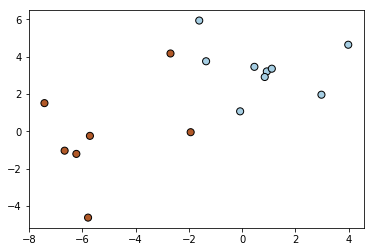

In [15]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, edgecolors='k')

##### NaNを埋める方法もある（データを削らないように）

平均値で埋める場合

In [16]:
from sklearn.preprocessing import Imputer
missing_value_to_mean = Imputer()
missing_value_to_mean.fit(X) # 平均値を学習
X_new = missing_value_to_mean.transform(X) # 新しく作り直す
X_new

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,  -1.57953962e+01],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.70755753e+01,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

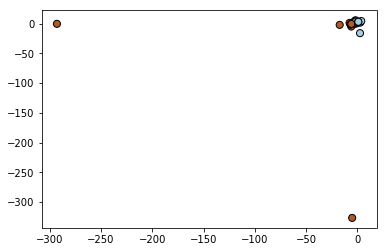

In [17]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, edgecolors='k')

中央値で埋める場合

In [18]:
missing_value_to_median = Imputer(strategy='median')
missing_value_to_median.fit(X)
X_new2 = missing_value_to_median.transform(X)
X_new2

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,   1.50990300e+00],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.61177100e+00,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

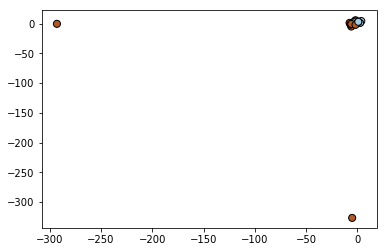

In [19]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y, s=50, edgecolors='k')

# 特徴抽出

##### 文章の場合

ダウンロード

In [20]:
import urllib.request
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", "allice.txt")

('allice.txt', <http.client.HTTPMessage at 0xa5bd310>)

In [21]:
with open('allice.txt', 'r', encoding='UTF-8') as f:
    print(f.read()[710:1400])



CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ thought Alice ‘without pictures or
conversations?’

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice 


単語をカウントするためにインスタンスを作成し、ファイルを解析

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
txt_vec = CountVectorizer(input='filename')

In [23]:
txt_vec.fit(['allice.txt'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='filename',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

結果を確認

In [25]:
txt_vec.get_feature_names()[0:50]

['000',
 '11',
 '1500',
 '1887',
 '1994',
 '20',
 '2001',
 '2008',
 '2016',
 '25',
 '30',
 '4557',
 '50',
 '501',
 '596',
 '60',
 '6221541',
 '64',
 '801',
 '809',
 '84116',
 '90',
 '99712',
 '_i_',
 'abide',
 'able',
 'about',
 'above',
 'absence',
 'absurd',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessible',
 'accident',
 'accidentally',
 'accordance',
 'account',
 'accounting',
 'accounts',
 'accusation',
 'accustomed',
 'ache',
 'across',
 'act',
 'active',
 'actual']

学習された単語の数を確認（3019次元ベクトルということ）

In [26]:
len(txt_vec.get_feature_names())

3019

In [31]:
allice_vec = txt_vec.transform(['allice.txt'])

In [32]:
allice_vec

<1x3019 sparse matrix of type '<class 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [33]:
allice_vec.shape

(1, 3019)

arrayにして中身を確認

In [35]:
allice_vec = allice_vec.toarray()

In [36]:
allice_vec[0, 100:120]

array([  6,   5,   3,   4,   1,   1,   1,   1,   5,  13,  16,   1,  12,
        61,   1, 940,   2,   9,   5,   2], dtype=int64)

単語と出現個数でベクトル化

In [38]:
for word,count in zip(txt_vec.get_feature_names()[100:120], allice_vec[0, 100:120]):
    print(word, count)

along 6
aloud 5
already 3
also 4
alteration 1
altered 1
alternate 1
alternately 1
altogether 5
always 13
am 16
ambition 1
among 12
an 61
ancient 1
and 940
anger 2
angrily 9
angry 5
animal 2


##### 画像の場合
わかりにくいため、クラスは使わずにやってみる

In [33]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

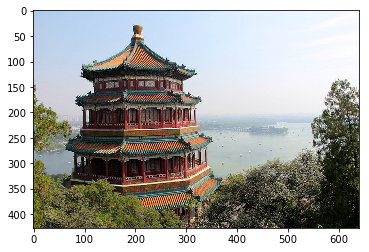

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(china);

In [35]:
china.shape

(427, 640, 3)

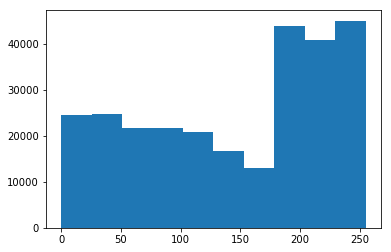

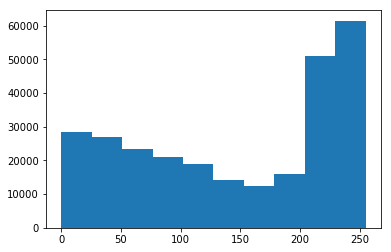

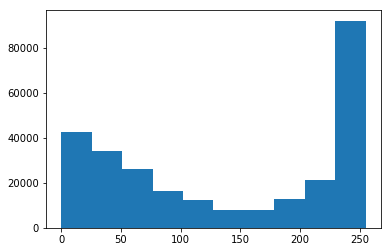

In [36]:
# ヒストグラムを作る
# RGB
histR = plt.hist(china[:,:,0].ravel(), bins=10)
plt.show()
histG = plt.hist(china[:,:,1].ravel(), bins=10)
plt.show()
histB = plt.hist(china[:,:,2].ravel(), bins=10)
plt.show()

↑Rであれば、横がRの数字、縦軸が画素の数

In [37]:
# ヒストグラムを横につなげる
import numpy as np
histRGBcat = np.hstack((histR[0], histG[0], histB[0]))

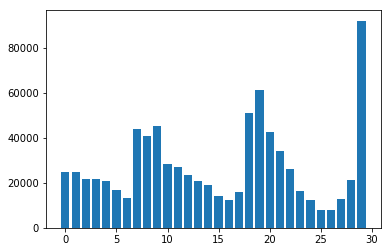

In [40]:
# これが画像の特徴ベクトルとなる
plt.bar(range(len(histRGBcat)), histRGBcat);

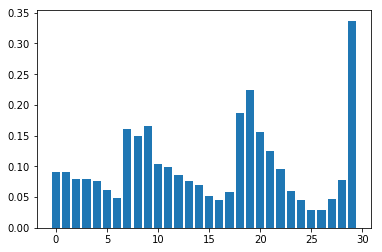

In [39]:
# 全体で足して１になるように（正規化）
histRGBcat_l1 = histRGBcat / (china.shape[0]*china.shape[1])
plt.bar(range(len(histRGBcat_l1)), histRGBcat_l1);

# 特徴選択
不要な特徴は除外する、有用な特徴だけで学習する

In [39]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [40]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [41]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

特徴を選択する

In [42]:
from sklearn.feature_selection import SelectKBest # 上位K個のベストな特徴を抽出する
from sklearn.feature_selection import chi2 # 負荷の軽い方法もある（かい２じょう基準）

In [43]:
skb = SelectKBest(chi2, k=20) # 20個持ってくる
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x0A9C92B8>)

In [44]:
X_train_new = skb.transform(X_train) # それを取り出す
X_train_new.shape, X_train.shape

((455, 20), (455, 30))

In [45]:
skb.get_support() # どの20個が使われたか確認

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False], dtype=bool)

In [46]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], 
      dtype='<U23')

特徴を30個全部使う場合から1個しか使わない場合まで繰り返し、結果を比較する

In [47]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
from sklearn.model_selection import StratifiedKFold

k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:

    ss = StratifiedKFold(n_splits=10, 
                         shuffle=True, 
                         random_state=2)
    score = []
    for train_index, val_index in ss.split(X_train,
                                           y_train):

        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]

        skb = SelectKBest(chi2, k=k)
        skb.fit(X_train2, y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val    = skb.transform(X_val)
        
        clf.fit(X_new_train2, y_train2)
        score.append( clf.score(X_new_val, y_val) )

    scores.append( np.array(score).mean() )
    std.append( np.array(score).std() )
    
scores = np.array(scores)
std = np.array(std)
scores

array([ 0.90560386,  0.92753623,  0.92536232,  0.91879227,  0.92971014,
        0.93628019,  0.93850242,  0.9363285 ,  0.95391304,  0.95830918,
        0.96048309,  0.96048309,  0.96043478,  0.96043478,  0.962657  ,
        0.96043478,  0.962657  ,  0.962657  ,  0.962657  ,  0.962657  ,
        0.962657  ,  0.962657  ,  0.962657  ,  0.962657  ,  0.962657  ,
        0.96048309,  0.96270531,  0.96048309,  0.95826087,  0.95826087])

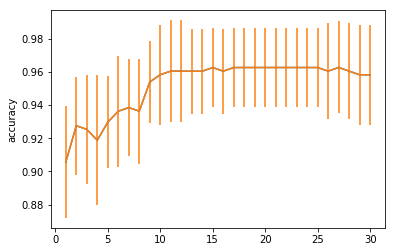

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)
plt.ylabel("accuracy")

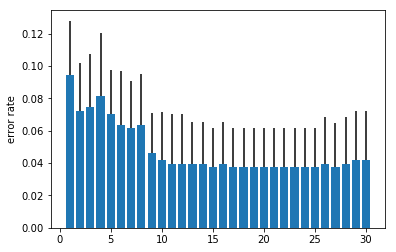

In [49]:
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape), # エラーの中心に見ることもできる
                                 std])
plt.ylabel("error rate")

# 特徴変換
特徴を２つ足して新たな特徴量としたり、重みをつけたりして工夫する

In [58]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix

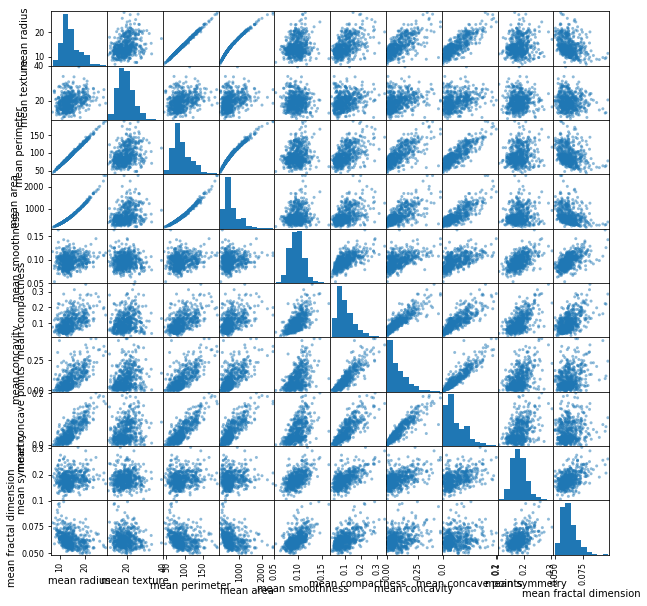

In [62]:
# 最初の10次元を見てみる
df = pd.DataFrame(data.data[:, 0:10], 
                  columns=data.feature_names[0:10])
scatter_matrix(df, figsize=(10,10));

↑○番目の特徴と○番目の特徴を次元にしてプロットできる

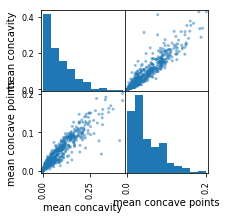

In [63]:
# 6と7
df = pd.DataFrame(data.data[:, 6:8],
                  columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3));

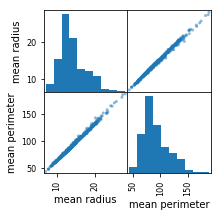

In [64]:
# 0と2
df = pd.DataFrame(data.data[:, [0,2]],
                  columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3,3));

↑相関が強い（どっちかが決まれば決まる。２つはいらない）

In [65]:
# 取り出す
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]
X.shape, y.shape

((569, 2), (569,))

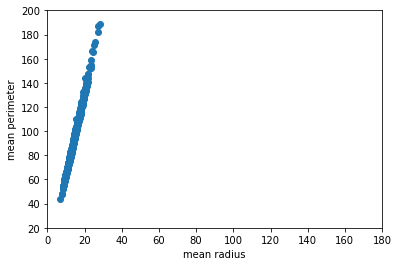

In [66]:
# 再度プロット
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [67]:
# 上の直線を新たな特徴量とするイメージ
from sklearn.decomposition import PCA

In [70]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [72]:
X_new = pca.transform(X)

(-60, 120)

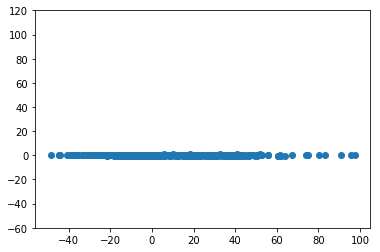

In [73]:
# プロットする
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

↑直線になった（片方の次元は意味がなくなった）

In [74]:
# 分散を見る
pca.explained_variance_

array([  6.01747863e+02,   5.20297651e-02])

In [75]:
# 比率
pca.explained_variance_ / pca.explained_variance_.sum()

array([  9.99913543e-01,   8.64569199e-05])

In [76]:
pca.explained_variance_ratio_

array([  9.99913543e-01,   8.64569199e-05])

##### 別の例

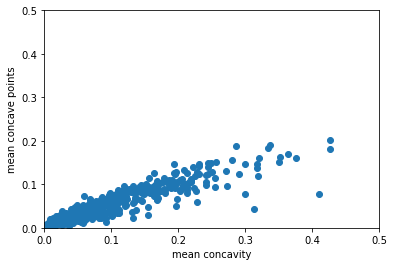

In [77]:
# 6と7
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

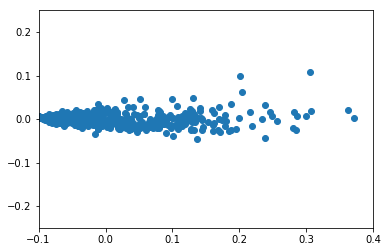

In [78]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [79]:
pca.explained_variance_

array([ 0.00765906,  0.00018804])

In [80]:
pca.explained_variance_ratio_ # 寄与率

array([ 0.97603731,  0.02396269])

##### データ全体でやる

In [81]:
X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

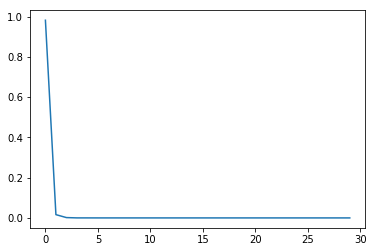

In [82]:
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)

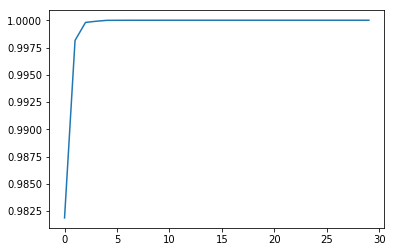

In [83]:
# 寄与率
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [84]:
# PCAに変換
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

In [85]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [86]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.94736842105263153

↑回転しただけ、まだ３０次元

In [87]:
# 一次元だけ使う
clf.fit(X_train_pca[:, 0:1], y_train)
clf.score(X_test_pca[:, 0:1], y_test)

0.92105263157894735

↑１次元だけでも９２％

In [88]:
clf.fit(X_train_pca[:, 0:3], y_train)
clf.score(X_test_pca[:, 0:3], y_test)

0.94736842105263153

In [89]:
# 全部の次元について試してみる
scores = []
i_range = range(1,31)

for i in i_range:

    clf.fit(X_train_pca[:, 0:i], y_train)
    scores.append( clf.score(X_test_pca[:, 0:i],
                             y_test) )
    
scores = np.array(scores)

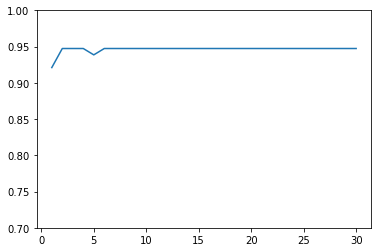

In [90]:
plt.plot(i_range, scores)
plt.ylim(0.7,1);

↑二次元だけ使えば十分

In [91]:
clf.fit(X_train_pca[:, 0:2], y_train)
clf.score(X_test_pca[:, 0:2], y_test)

0.94736842105263153

##### 非線形（多項式）変換

In [92]:
from sklearn.preprocessing import PolynomialFeatures

degree 1: $x_1, x_2, x_3$

degree 2: $x_1 x_2, x_1 x_3, x_2 x_3$

degree 3: $x_1 x_2 x_3$

degree 1: $x_1, x_2, x_3, x_4$

degree 2: $x_1 x_2, x_1 x_3, x_1 x_4, x_2 x_3, x_2 x_4, x_3 x_4$

degree 3: $x_1 x_2 x_3, x_1 x_2 x_4, x_1 x_3 x_4, x_2 x_3 x_4$

degree 4: $x_1 x_2 x_3 x_4$

In [93]:
#２次（２つとってくる場合）
polf = PolynomialFeatures(degree=2)
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [94]:
X_train_poly = polf.transform(X_train)
X_test_poly  = polf.transform(X_test)

In [95]:
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

↑組み合わせだからすごい増える

In [96]:
X_test.shape, X_test_poly.shape

((114, 30), (114, 496))

In [97]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.96491228070175439

In [98]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

↑２次元にしたから少し増えた

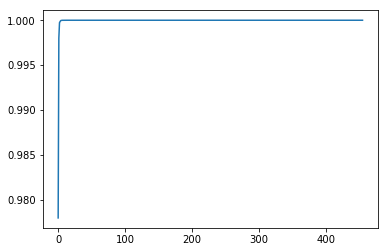

In [100]:
# PCAで見てみると
pca.fit(X_train_poly)
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [101]:
# PCAで削減
scores = []

n_features = X_train_poly.shape[1]
i_range = range(1, n_features, 10)

X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca  = pca.transform(X_test_poly)

for i in i_range:

    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    
    scores.append( clf.score(X_test_poly_pca[:, 0:i],
                             y_test) )

scores = np.array(scores)

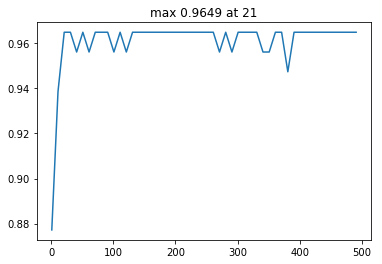

In [102]:
plt.plot(i_range, scores);
plt.title("max {0:.4f} at {1}".format(scores.max(), 
                                      i_range[np.argmax(scores)]))

d= 2
max dimension:  496
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
d= 3
max dimension:  5456
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
d= 4
max dimension:  46376
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,


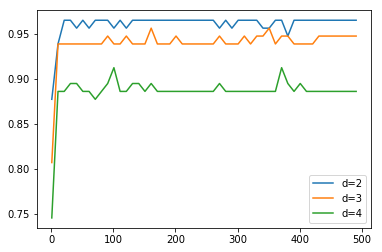

In [103]:
# ３次、４次まで試してみる
for d in [2, 3, 4]:
    print("d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly  = polf.transform(X_test)

    pca.fit(X_train_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca  = pca.transform(X_test_poly)
    
    scores = []
    n_features = min(500, X_train_poly.shape[1])
    i_range = range(1, n_features, 10)
    
    print("max dimension: ", X_train_poly.shape[1])

    print("i=", end="")
    for i in i_range:
        print(i, end=",")
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append( clf.score(X_test_poly_pca[:, 0:i], y_test) )
    print("")
    
    scores = np.array(scores)
    plt.plot(i_range, scores, label="d={0}".format(d))

plt.legend();

↑２次までのときのほうが性能が良い（多項式を増やせばいいというわけではない！）